In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
%matplotlib inline
import seaborn as sns;sns.set()

data=fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [7]:
train=fetch_20newsgroups(subset='train',categories=data.target_names)
test=fetch_20newsgroups(subset='test',categories=data.target_names)

print(len(test.data))

7532


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model=make_pipeline(TfidfVectorizer(),MultinomialNB())

model.fit(train.data,train.target)

label=model.predict(test.data)

Text(167.25, 0.5, 'Predicted')

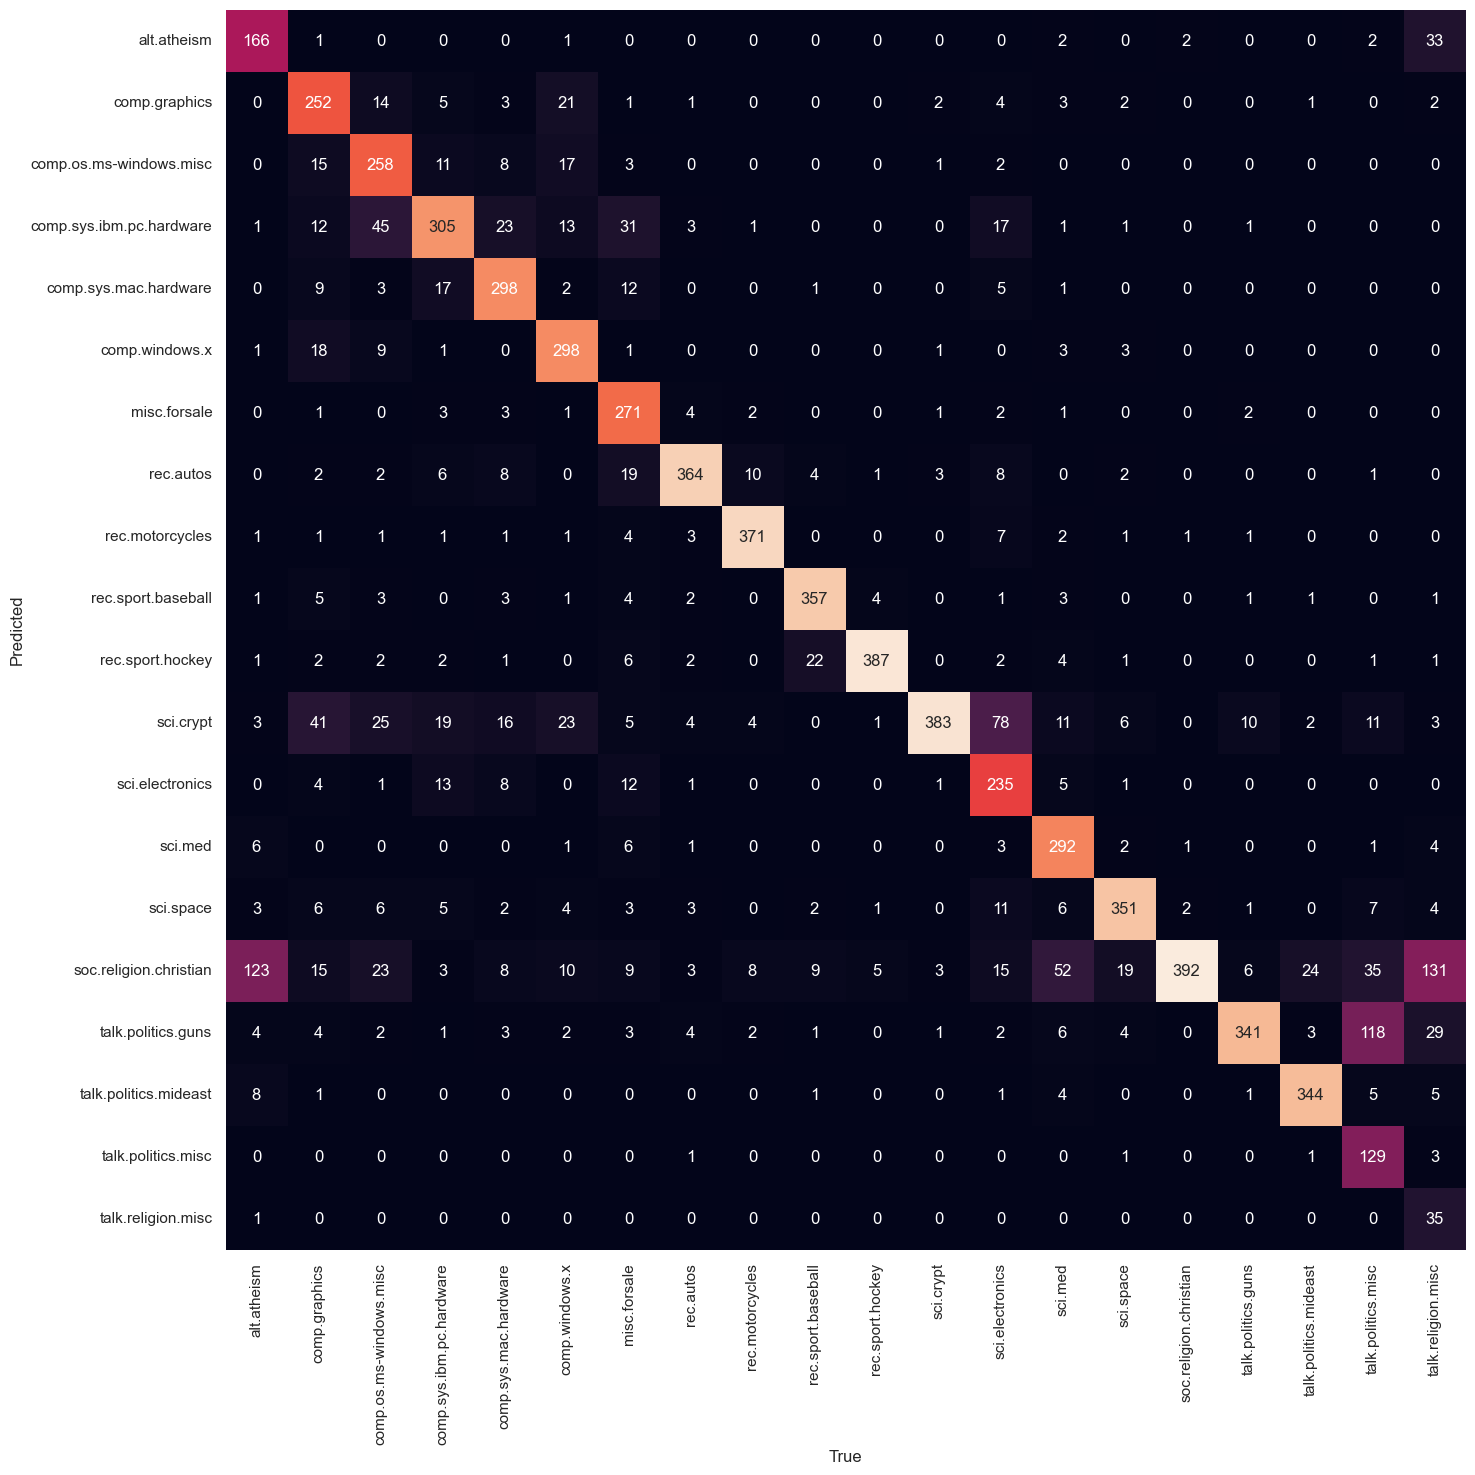

In [4]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(test.target,label)
plt.figure(figsize = (16,25))
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,xticklabels=train.target_names,yticklabels=train.target_names)

plt.xlabel('True')
plt.ylabel('Predicted')

In [5]:
def predict_category(s,train=train,model=model):
    pred=model.predict([s])
    return train.target_names[pred[0]]

In [6]:
predict_category('Space X')

'sci.space'